# Exploring the Data

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline

from mnist import MNIST

mndata = MNIST('./python-mnist/data/')
images, labels = mndata.load_training()

images = np.array(images)
images_normalized = images / 255.

labels = np.array(labels)

print(images.shape)
print(labels.shape)
print(np.min(images), np.max(images))

possible_labels = set(labels)

print(possible_labels)

num_classes = len(possible_labels)

(60000, 784)
(60000,)
0 255
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


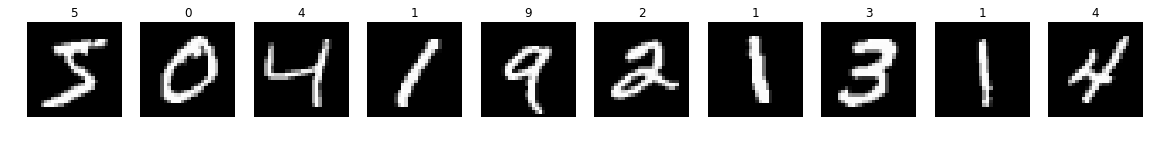

In [2]:
fig, axs = plt.subplots(1, 10, figsize=(20,10))

for i in range(10):
    im = images[i].reshape(28, 28)
    label = labels[i]

    plt.subplot(1, 10, i+1)
    
    plt.axis('off')
    plt.title(str(label))    

    plt.imshow(im, cmap='gray', vmin=0, vmax=255)
    
plt.show()

# Model Architecture

In [3]:
def one_hot(x, num_classes):
    cat = np.zeros((x.size, num_classes))
    cat[np.arange(x.size), x] = 1
    return cat

labels_one_hot = one_hot(labels, num_classes)

for i in range(10):
    print(labels[i])
    print(labels_one_hot[i])
    print()

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]

0
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

4
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]

1
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]

9
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]

2
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]

1
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]

3
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]

1
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]

4
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]



# Implementing Softmax


In [4]:
def softmax(z):
    z = np.exp(z)
    return z/np.sum(z)

# Splitting the Data

In [5]:
np.random.seed(27)

permutation = np.random.permutation(len(images))

images_permuted = images_normalized[permutation]
labels_permuted = labels[permutation]
labels_one_hot_permutated = labels_one_hot[permutation]

validation_amount = 10000

train_images = images_permuted[:-validation_amount]
train_labels = labels_permuted[:-validation_amount]
train_labels_one_hot = labels_one_hot_permutated[:-validation_amount]

validation_images = images_permuted[-validation_amount:]
validation_labels = labels_permuted[-validation_amount:]
validation_labels_one_hot = labels_one_hot_permutated[-validation_amount:]

# Initializing weights

In [6]:
np.random.seed(27)
weights = np.random.randn(images_normalized.shape[1], num_classes) * 0.01
biases = np.random.randn(num_classes) * 0.01

# Calculating outputs

In [7]:
ys = []
preds = []

for image in train_images:
    z = np.dot(image, weights) + biases
    y = softmax(z)
    pred = np.argmax(y)
    
    ys.append(y)
    preds.append(pred)

for i in range(10):
    print("label:", train_labels[i])
    print("preds:", preds[i])
    print(np.round(ys[i], 2))    
    print("###################################################")
    
accuracy = np.mean(preds == train_labels) * 100
print("Training Accuracy:", accuracy)

label: 0
preds: 5
[0.1  0.1  0.08 0.1  0.11 0.12 0.1  0.09 0.1  0.1 ]
###################################################
label: 3
preds: 1
[0.1  0.11 0.11 0.1  0.1  0.1  0.1  0.09 0.09 0.09]
###################################################
label: 1
preds: 7
[0.1  0.1  0.1  0.1  0.1  0.09 0.1  0.11 0.11 0.1 ]
###################################################
label: 8
preds: 7
[0.1  0.1  0.1  0.09 0.11 0.09 0.1  0.11 0.1  0.1 ]
###################################################
label: 5
preds: 5
[0.11 0.11 0.09 0.1  0.09 0.11 0.1  0.09 0.09 0.1 ]
###################################################
label: 0
preds: 2
[0.1  0.1  0.11 0.09 0.1  0.1  0.1  0.1  0.1  0.1 ]
###################################################
label: 1
preds: 4
[0.1  0.1  0.1  0.09 0.11 0.09 0.1  0.11 0.1  0.09]
###################################################
label: 1
preds: 7
[0.09 0.1  0.11 0.1  0.1  0.09 0.1  0.11 0.1  0.1 ]
###################################################
label: 9
preds: 5
[0.11 

# Training Implementation

In [8]:
learning_rate = 0.01

weight_updates = np.zeros(weights.shape)
bias_updates = np.zeros(biases.shape)

start = time.time()

for image_index in range(len(train_images)):
    x = train_images[image_index]
    
    z = np.dot(x, weights) + biases
    y = softmax(z)
    t = train_labels_one_hot[image_index]
    
    for i in range(weights.shape[0]):
        for j in range(weights.shape[1]):
            weight_updates[i, j] += x[i] * (y[j] - t[j])
    
    for j in range(bias_updates.shape[0]):
        bias_updates[j] += (y[j] - t[j])
    
    if image_index % 1000 == 0:
        print(image_index)

weights = weights - learning_rate * weight_updates / len(train_images)
biases = biases - learning_rate * bias_updates / len(train_images)

end = time.time()

ys = []
preds = []

for image in train_images:
    z = np.dot(image, weights) + biases
    y = softmax(z)
    pred = np.argmax(y)
    
    ys.append(y)
    preds.append(pred)

for i in range(10):
    print("label:", train_labels[i])
    print("preds:", preds[i])
    print(np.round(ys[i], 2))    
    print("###################################################")
    
accuracy = np.mean(preds == train_labels) * 100
print("Training Accuracy:", accuracy)
print("Time taken:", (end-start), "seconds")

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
label: 0
preds: 5
[0.1  0.1  0.08 0.1  0.11 0.12 0.1  0.09 0.1  0.1 ]
###################################################
label: 3
preds: 1
[0.11 0.11 0.11 0.1  0.1  0.1  0.1  0.08 0.1  0.09]
###################################################
label: 1
preds: 8
[0.1  0.1  0.1  0.1  0.1  0.09 0.1  0.11 0.11 0.1 ]
###################################################
label: 8
preds: 7
[0.1  0.1  0.1  0.09 0.11 0.09 0.1  0.11 0.1  0.1 ]
###################################################
label: 5
preds: 5
[0.11 0.1  0.09 0.1  0.09 0.11 0.1  0.09 0.09 0.1 ]
###################################################
label: 0
preds: 2
[0.1  0.1  0.11 0.09 0.1  0.1  0.1  0.1  0.1  0.1 ]
#################################

# Vectorization

In [9]:
np.random.seed(27)

weights = np.random.randn(images_normalized.shape[1], num_classes) * 0.01
biases = np.random.randn(num_classes) * 0.01

weight_updates = np.zeros(weights.shape)
bias_updates = np.zeros(biases.shape)

start = time.time()

for image_index in range(len(train_images)):
    x = train_images[image_index]
    
    z = np.dot(x, weights) + biases
    y = softmax(z)
    t = train_labels_one_hot[image_index]
    
    for i in range(weights.shape[0]):
        weight_updates[i] += x[i] * (y - t)

    bias_updates += y - t
    
    if image_index % 1000 == 0:
        print(image_index)

weights = weights - learning_rate * weight_updates / len(train_images)
biases = biases - learning_rate * bias_updates / len(train_images)        

end = time.time()

ys = []
preds = []

for image in train_images:
    z = np.dot(image, weights) + biases
    y = softmax(z)
    pred = np.argmax(y)
    
    ys.append(y)
    preds.append(pred)

for i in range(10):
    print("label:", train_labels[i])
    print("preds:", preds[i])
    print(np.round(ys[i], 2))    
    print("###################################################")
    
accuracy = np.mean(preds == train_labels) * 100
print("Training Accuracy:", accuracy)
print("Time taken:", (end-start), "seconds")


0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
label: 0
preds: 5
[0.1  0.1  0.08 0.1  0.11 0.12 0.1  0.09 0.1  0.1 ]
###################################################
label: 3
preds: 1
[0.11 0.11 0.11 0.1  0.1  0.1  0.1  0.08 0.1  0.09]
###################################################
label: 1
preds: 8
[0.1  0.1  0.1  0.1  0.1  0.09 0.1  0.11 0.11 0.1 ]
###################################################
label: 8
preds: 7
[0.1  0.1  0.1  0.09 0.11 0.09 0.1  0.11 0.1  0.1 ]
###################################################
label: 5
preds: 5
[0.11 0.1  0.09 0.1  0.09 0.11 0.1  0.09 0.09 0.1 ]
###################################################
label: 0
preds: 2
[0.1  0.1  0.11 0.09 0.1  0.1  0.1  0.1  0.1  0.1 ]
#################################

In [10]:
np.random.seed(27)

weights = np.random.randn(images_normalized.shape[1], num_classes) * 0.01
biases = np.random.randn(1, num_classes) * 0.01

weight_updates = np.zeros(weights.shape)
bias_updates = np.zeros(biases.shape)

start = time.time()

for image_index in range(len(train_images)):
    x = train_images[image_index:image_index+1]
    
    z = np.dot(x, weights) + biases
    y = softmax(z)
    t = train_labels_one_hot[image_index]
    
    weight_updates += x.T * (y - t)

    bias_updates += y - t
    
    if image_index % 1000 == 0:
        print(image_index)

end = time.time()

weights = weights - learning_rate * weight_updates / len(train_images)
biases = biases - learning_rate * bias_updates / len(train_images)

ys = []
preds = []

for image in train_images:
    z = np.dot(image, weights) + biases
    y = softmax(z)
    pred = np.argmax(y)
    
    ys.append(y)
    preds.append(pred)

accuracy = np.mean(preds == train_labels) * 100
print("Training Accuracy:", accuracy)
print("Time taken:", (end-start), "seconds")

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
Training Accuracy: 7.656000000000001
Time taken: 1.4084036350250244 seconds


In [11]:
def softmax_vectorized(Z):
    tmp = np.exp(Z)
    return tmp/np.sum(tmp, axis=1, keepdims=True)

In [12]:
def softmax_vectorized(Z):
    tmp = np.exp(Z)
    return tmp/np.sum(tmp, axis=1, keepdims=True)

In [13]:
np.random.seed(27)

weights = np.random.randn(images_normalized.shape[1], num_classes) * 0.01
biases = np.random.randn(1, num_classes) * 0.01

weight_updates = np.zeros(weights.shape)
bias_updates = np.zeros(biases.shape)

start = time.time()

Z = np.dot(train_images, weights) + biases
Y = softmax_vectorized(Z)

weight_updates = np.dot(train_images.T, Y-train_labels_one_hot)
bias_updates = np.sum(Y-train_labels_one_hot, axis=0)  

weights = weights - learning_rate * weight_updates / len(train_images)
biases = biases - learning_rate * bias_updates / len(train_images)

end = time.time()

Z = np.dot(train_images, weights) + biases
Y = softmax_vectorized(Z)

preds = np.argmax(Y, axis=1)

accuracy = np.mean(preds == train_labels) * 100
print("Training Accuracy:", accuracy)  
print("Time taken:", (end-start), "seconds")


Training Accuracy: 7.656000000000001
Time taken: 0.08394432067871094 seconds


# Training

In [14]:
np.random.seed(27)

weights = np.random.randn(images_normalized.shape[1], num_classes) * 0.01
biases = np.random.randn(1, num_classes) * 0.01

weight_updates = np.zeros(weights.shape)
bias_updates = np.zeros(biases.shape)

start = time.time()

for i in range(10):
    Z = np.dot(train_images, weights) + biases
    Y = softmax_vectorized(Z)
    
    preds = np.argmax(Y, axis=1)
    accuracy = np.mean(preds == train_labels) * 100
    print("Training Accuracy:", accuracy)

    weight_updates = np.dot(train_images.T, Y-train_labels_one_hot)
    bias_updates = np.sum(Y-train_labels_one_hot, axis=0)  

    weights = weights - learning_rate * weight_updates / len(train_images)
    biases = biases - learning_rate * bias_updates / len(train_images)

Z = np.dot(train_images, weights) + biases
Y = softmax_vectorized(Z)
preds = np.argmax(Y, axis=1)
accuracy = np.mean(preds == train_labels) * 100
print("Training Accuracy:", accuracy)

end = time.time()

print("Time taken:", (end-start), "seconds")

Training Accuracy: 6.456
Training Accuracy: 7.656000000000001
Training Accuracy: 9.198
Training Accuracy: 11.332
Training Accuracy: 13.648
Training Accuracy: 16.572
Training Accuracy: 19.695999999999998
Training Accuracy: 23.518
Training Accuracy: 27.523999999999997
Training Accuracy: 31.772
Training Accuracy: 36.134
Time taken: 0.8723506927490234 seconds


In [26]:
np.random.seed(27)

weights = np.random.randn(images_normalized.shape[1], num_classes) * 0.01
biases = np.random.randn(num_classes) * 0.01

learning_rate = 0.01

max_consecutive_non_improvements = 3
num_consecutive_non_improvements = 0

best_validaton_accuracy = 0

iteration = 0
best_iteration = 0

train_accuracies = []
train_losses = []

validation_accuracies = []
validation_losses = []

start = time.time()

while num_consecutive_non_improvements < max_consecutive_non_improvements:
    Z = np.dot(train_images, weights) + biases
    Y = softmax_vectorized(Z)
    
    if iteration % 100 == 0:
        print("Iteration:", iteration)
        
        preds = np.argmax(Y, axis=1)
        accuracy = np.mean(preds == train_labels) * 100
        loss = -np.mean(np.multiply(train_labels_one_hot, np.log(Y)))
        
        train_accuracies.append(accuracy)
        train_losses.append(loss)
        
        print("Training Accuracy:", accuracy)
        print("Training Loss:", loss)
        
        Z_val = np.dot(validation_images, weights) + biases
        Y_val = softmax_vectorized(Z_val)
        
        preds_val = np.argmax(Y_val, axis=1)
        accuracy_val = np.mean(preds_val == validation_labels) * 100
        loss_val = -np.mean(np.multiply(validation_labels_one_hot, np.log(Y_val)))
        
        validation_accuracies.append(accuracy_val)
        validation_losses.append(loss_val)
        
        print("Validation Accuracy:", accuracy_val)
        print("Validation Loss:", loss_val)

        print("##################################################################")
        
        if accuracy_val > best_validaton_accuracy:
            best_validaton_accuracy = accuracy_val
            num_consecutive_non_improvements = 0
            best_iteration = iteration
            
            # save the weights
            with open("weights_save_" + str(iteration) + ".npy", "wb") as save_file:
                np.save(save_file, np.array([weights, biases]))
            
        else:
            num_consecutive_non_improvements += 1
    
    weight_updates = np.dot(train_images.T, Y-train_labels_one_hot) / len(train_images)
    bias_updates = np.sum(Y-train_labels_one_hot, axis=0) / len(train_images)

    weights = weights - learning_rate * weight_updates
    biases = biases - learning_rate * bias_updates
    
    iteration += 1
    
end = time.time()

print("Time taken:", (end-start), "seconds")
    
print("The best weights were at iteration:", best_iteration)
    
with open("weights_save_" + str(best_iteration) + ".npy", "rb") as save_file:
    saved_values = np.load(save_file)
    weights = saved_values[0]
    biases = saved_values[1]

Iteration: 0
Training Accuracy: 6.456
Training Loss: 0.23250812566634582
Validation Accuracy: 6.3100000000000005
Validation Loss: 0.2324347865619617
##################################################################
Iteration: 100
Training Accuracy: 77.03999999999999
Training Loss: 0.1563135523651483
Validation Accuracy: 77.25999999999999
Validation Loss: 0.15614688739963434
##################################################################
Iteration: 200
Training Accuracy: 80.472
Training Loss: 0.11984387650017364
Validation Accuracy: 80.55
Validation Loss: 0.11972304641510256
##################################################################
Iteration: 300
Training Accuracy: 82.272
Training Loss: 0.10021026137434574
Validation Accuracy: 82.33
Validation Loss: 0.10012856567960335
##################################################################
Iteration: 400
Training Accuracy: 83.36
Training Loss: 0.08819486949977062
Validation Accuracy: 83.26
Validation Loss: 0.0881404783382214
###

Iteration: 3900
Training Accuracy: 89.036
Training Loss: 0.04151387690117122
Validation Accuracy: 88.92999999999999
Validation Loss: 0.041457237713179204
##################################################################
Iteration: 4000
Training Accuracy: 89.082
Training Loss: 0.04128273423241599
Validation Accuracy: 88.94999999999999
Validation Loss: 0.041227478677517894
##################################################################
Iteration: 4100
Training Accuracy: 89.14999999999999
Training Loss: 0.04106046766076566
Validation Accuracy: 89.0
Validation Loss: 0.04100670883498477
##################################################################
Iteration: 4200
Training Accuracy: 89.178
Training Loss: 0.04084651852788459
Validation Accuracy: 89.03
Validation Loss: 0.04079436377363157
##################################################################
Iteration: 4300
Training Accuracy: 89.22
Training Loss: 0.04064037602338925
Validation Accuracy: 89.1
Validation Loss: 0.04058992723

# Testing

In [16]:
test_images, test_labels = mndata.load_testing()

test_images = np.array(test_images)
test_labels = np.array(test_labels)

test_images_normalized = test_images / 255.

test_labels_one_hot = one_hot(test_labels, num_classes)

Z_test = np.dot(test_images_normalized, weights) + biases
Y_test = softmax_vectorized(Z_test)

preds_test = np.argmax(Y_test, axis=1)

accuracy_test = np.mean(preds_test == test_labels) * 100
loss_test = -np.mean(np.multiply(test_labels_one_hot, np.log(Y_test)))

print("Test Accuracy:", accuracy_test)
print("Test Loss:", loss_test)
print("##################################################################")

Test Accuracy: 90.57
Test Loss: 0.0350872026014523
##################################################################


# Model Analysis

Digit Count:
[ 980 1135 1032 1010  982  892  958 1028  974 1009]


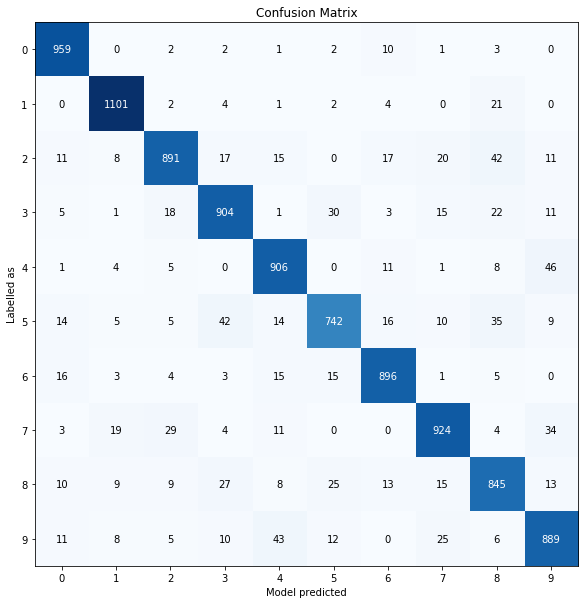

In [17]:
matrix = np.zeros((num_classes, num_classes), dtype=np.int32)
count = np.zeros((num_classes), dtype=np.int32)

for i in range(len(test_labels)):
    labelled_as = test_labels[i]
    predicted = preds_test[i]
    
    matrix[labelled_as][predicted] += 1
    count[labelled_as] += 1

print("Digit Count:")
print(count)
    
fig, ax = plt.subplots(1, 1, figsize=(10,10))
# , figsize=(20, 20)

classes = list(possible_labels)

ax.set(xticks=np.arange(matrix.shape[1]),
           yticks=np.arange(matrix.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title="Confusion Matrix",
           ylabel='Labelled as',
           xlabel='Model predicted')

thresh = matrix.max() / 2.

for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        ax.text(j, i, format(matrix[i, j], 'd'),
                ha="center", va="center",
                color="white" if matrix[i, j] > thresh else "black")

plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)

0.48928571428571427


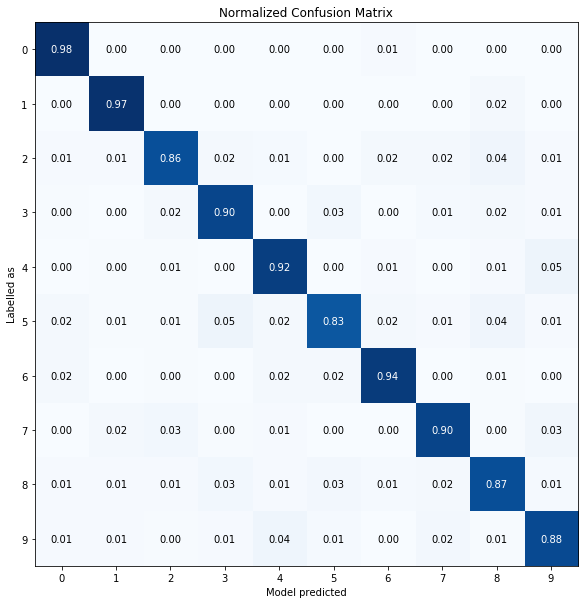

In [18]:
normalized_matrix = matrix.astype('float')/matrix.sum(axis=1)[:, np.newaxis]

fig, ax = plt.subplots(1, 1, figsize=(10,10))

ax.set(xticks=np.arange(normalized_matrix.shape[1]),
           yticks=np.arange(normalized_matrix.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title="Normalized Confusion Matrix",
           ylabel='Labelled as',
           xlabel='Model predicted')

thresh = normalized_matrix.max() / 2.

print(thresh)

for i in range(normalized_matrix.shape[0]):
    for j in range(normalized_matrix.shape[1]):
        ax.text(j, i, format(normalized_matrix[i, j], '.2f'),
                ha="center", va="center",
                color="white" if normalized_matrix[i, j] > thresh else "black")

plt.imshow(normalized_matrix, interpolation='nearest', cmap=plt.cm.Blues)
                                

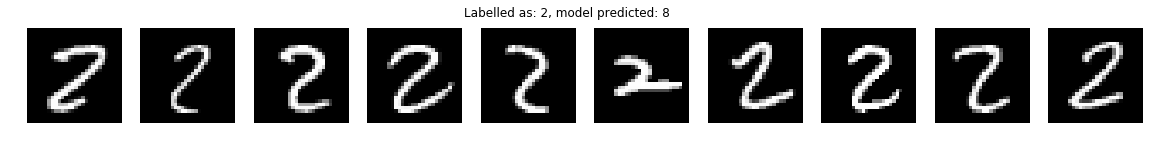

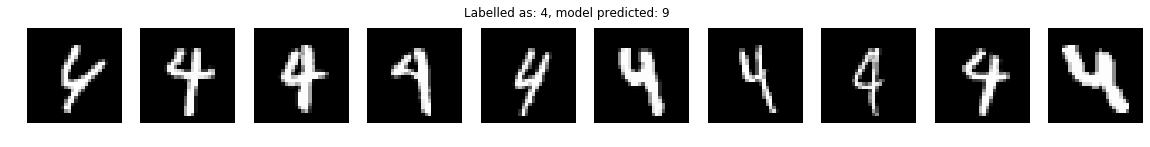

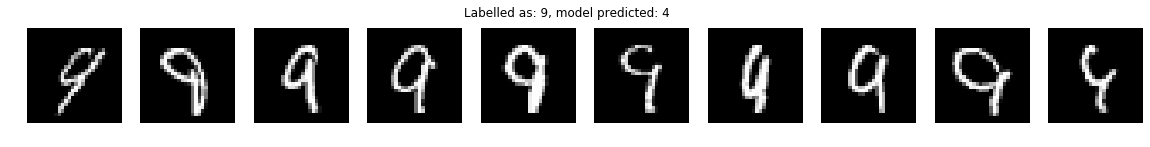

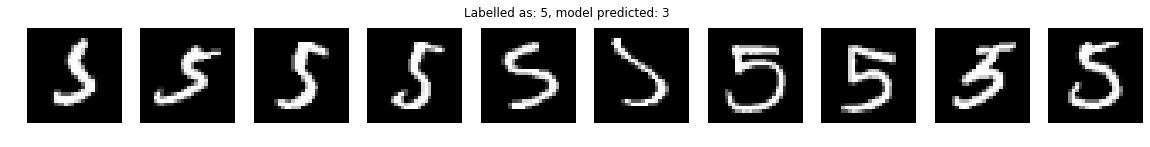

In [19]:
bad_pairs = set([(2,8), (4,9), (5,3), (9,4)])

bad_images = {}

for pair in bad_pairs:
    bad_images[pair] = []

for i in range(len(test_labels)):
    labelled_as = test_labels[i]
    predicted = preds_test[i]
    
    pair = (labelled_as, predicted)
    
    if pair in bad_pairs:
        bad_images[pair].append(test_images[i])
        
for pair in bad_pairs:
    display_images = bad_images[pair][:min(10, len(bad_images[pair]))]
    
    fig, axs = plt.subplots(1, 10, figsize=(20,2))
    
    for i, im in enumerate(display_images):
        im = im.reshape(28, 28)
        plt.subplot(1, 10, i+1)

        plt.axis('off')

        plt.imshow(im, cmap='gray', vmin=0, vmax=255)

    plt.suptitle("Labelled as: " + str(pair[0]) + ", model predicted: " + str(pair[1]))

    plt.show()

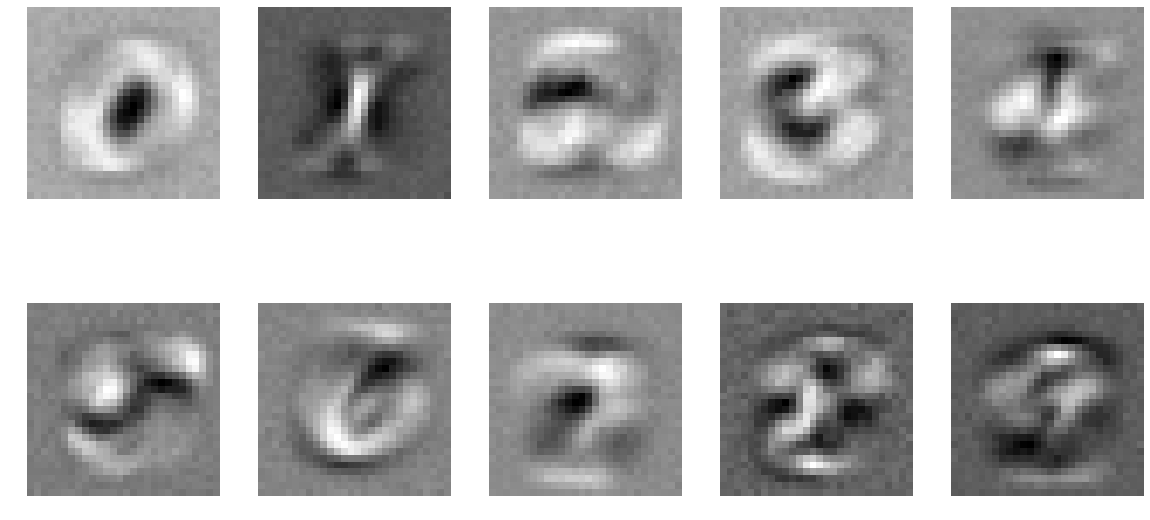

In [20]:
rows = 2
cols = 5

fig, axs = plt.subplots(rows, cols, figsize=(20,10))

for digit in range(10):
    w = weights[:, digit]

    im = w.reshape(28, 28)

    old_min = np.min(im)
    old_max = np.max(im)

    plt.subplot(rows, cols, digit+1)
    plt.axis("off")

    plt.imshow(im, cmap='gray', vmin=old_min, vmax=old_max)
    #
plt.show()           

[-0.13  0.21 -0.05 -0.09  0.07  0.33 -0.04  0.19 -0.46 -0.07]


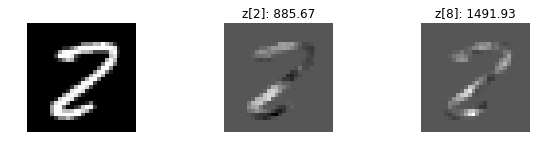

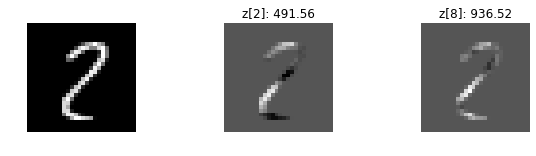

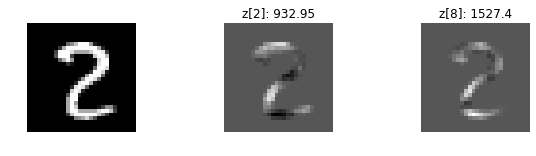

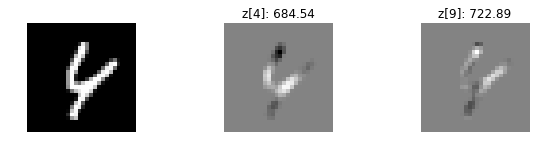

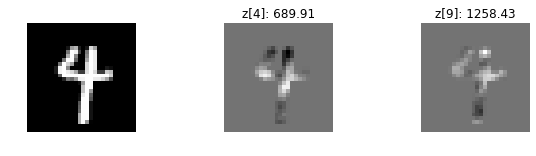

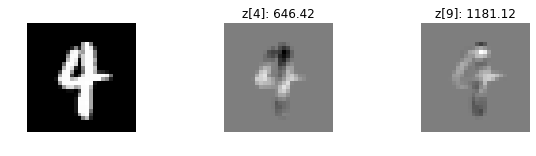

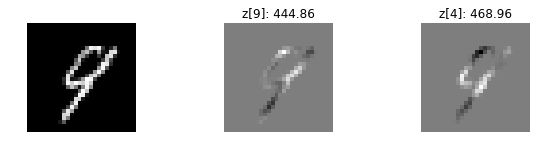

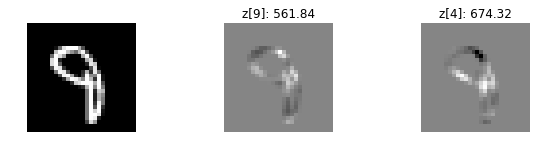

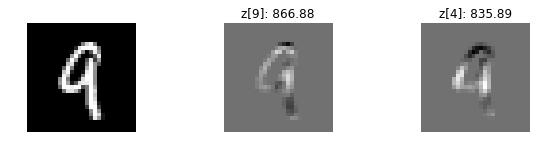

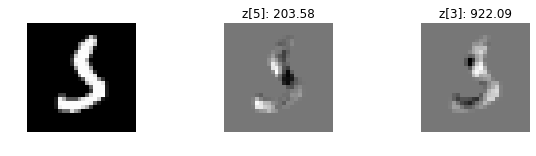

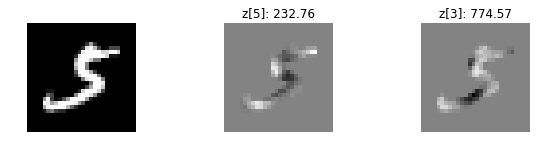

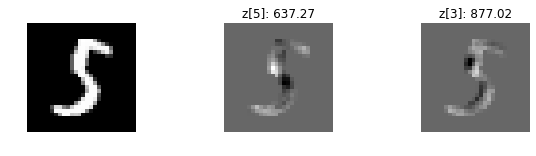

In [21]:
for bad_pair in bad_pairs:
    for i in range(3):
        im = bad_images[bad_pair][i]

        first_weights = weights[:, bad_pair[0]]
        im_mult_first_weights = np.multiply(im, first_weights)  #.clip(min=0)

        second_weights = weights[:, bad_pair[1]]
        im_mult_second_weights = np.multiply(im, second_weights)  #.clip(min=0)

        min_pix = np.min(np.array([im_mult_first_weights, im_mult_second_weights]))
        max_pix = np.max(np.array([im_mult_first_weights, im_mult_second_weights]))

        fig, axs = plt.subplots(1, 3, figsize=(10,2))

        plt.subplot(1, 3, 1)
        plt.axis('off')

        plt.imshow(im.reshape(28, 28), cmap='gray')

        plt.subplot(1, 3, 2)
        plt.axis('off')

        plt.imshow(im_mult_first_weights.reshape(28, 28), cmap='gray', vmin=min_pix, vmax=max_pix)
        plt.title("z[" + str(bad_pair[0]) + "]: " + str(np.round(np.sum(im_mult_first_weights) + biases[bad_pair[0]], 2)))
        
        plt.subplot(1, 3, 3)
        plt.axis('off')

        plt.imshow(im_mult_second_weights.reshape(28, 28), cmap='gray', vmin=min_pix, vmax=max_pix)
        plt.title("z[" + str(bad_pair[1]) + "]: " + str(np.round(np.sum(im_mult_second_weights) + biases[bad_pair[1]], 2)))

        fig.savefig("bad_pairs_" + str(bad_pair[0]) + "_" + str(bad_pair[1]) + "_" + str(i) + "_.png")
        
print(np.round(biases, 2))

# A side Idea

(784, 10)


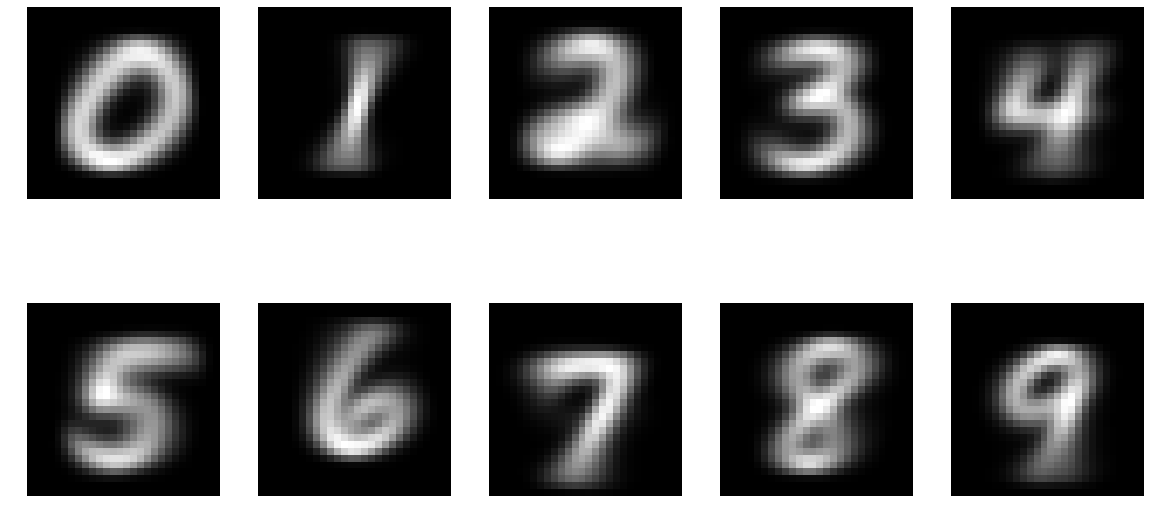

In [22]:
image_averaged_weights = np.zeros(weights.shape)

print(image_averaged_weights.shape)

for digit in range(10):
    image_averaged_weights[:, digit] = np.mean(train_images[train_labels == digit], axis=0)

rows = 2
cols = 5

fig, axs = plt.subplots(rows, cols, figsize=(20,10))

for digit in range(10):
    w = image_averaged_weights[:, digit]

    im = w.reshape(28, 28)

    old_min = np.min(im)
    old_max = np.max(im)

    plt.subplot(rows, cols, digit+1)
    plt.axis("off")

    plt.imshow(im, cmap='gray', vmin=old_min, vmax=old_max)
    
plt.show()

In [23]:
Z_test = np.dot(test_images_normalized, image_averaged_weights) 
Y_test = softmax_vectorized(Z_test)

preds_test = np.argmax(Y_test, axis=1)

accuracy_test = np.mean(preds_test == test_labels) * 100
loss_test = -np.mean(np.multiply(test_labels_one_hot, np.log(Y_test)))

print("Test Accuracy:", accuracy_test)
print("Test Loss:", loss_test)
print("##################################################################") 

Test Accuracy: 63.019999999999996
Test Loss: 0.19779891753806977
##################################################################


0.4933673469387755


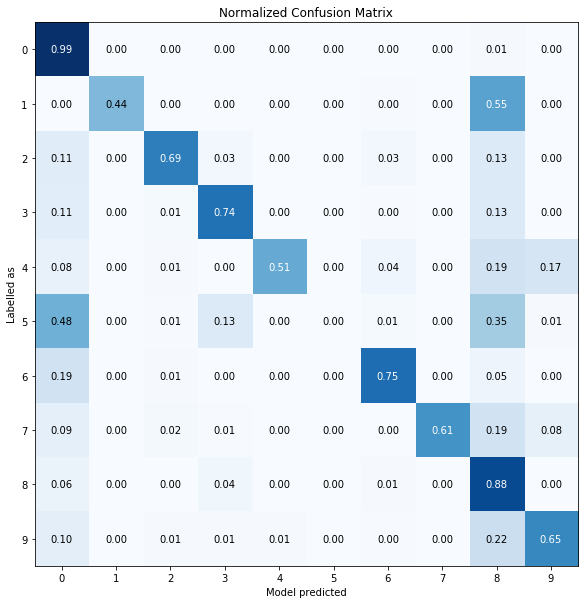

In [24]:
matrix = np.zeros((num_classes, num_classes), dtype=np.int32)
count = np.zeros((num_classes), dtype=np.int32)

for i in range(len(test_labels)):
    labelled_as = test_labels[i]
    predicted = preds_test[i]
    
    matrix[labelled_as][predicted] += 1
    count[labelled_as] += 1

normalized_matrix = matrix.astype('float')/matrix.sum(axis=1)[:, np.newaxis]

fig, ax = plt.subplots(1, 1, figsize=(10,10))

ax.set(xticks=np.arange(normalized_matrix.shape[1]),
           yticks=np.arange(normalized_matrix.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title="Normalized Confusion Matrix",
           ylabel='Labelled as',
           xlabel='Model predicted')

thresh = normalized_matrix.max() / 2.

print(thresh)

for i in range(normalized_matrix.shape[0]):
    for j in range(normalized_matrix.shape[1]):
        ax.text(j, i, format(normalized_matrix[i, j], '.2f'),
                ha="center", va="center",
                color="white" if normalized_matrix[i, j] > thresh else "black")

plt.imshow(normalized_matrix, interpolation='nearest', cmap=plt.cm.Blues)

(1, 8)
(5, 0)
(5, 8)


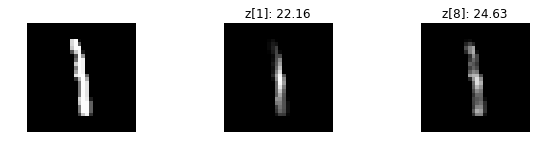

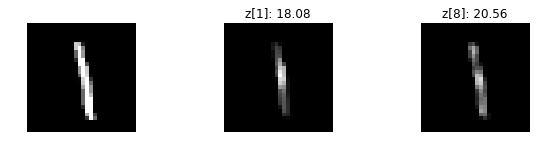

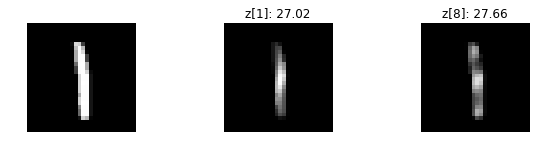

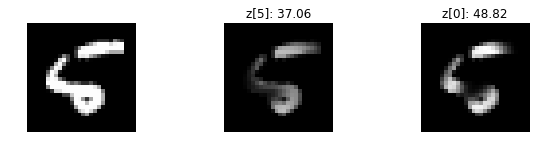

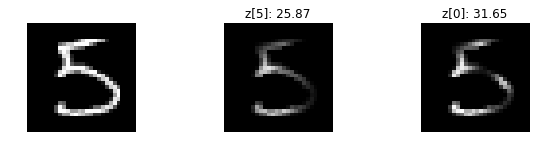

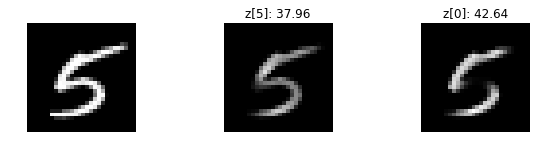

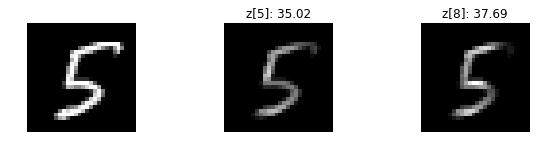

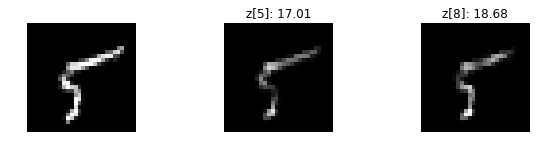

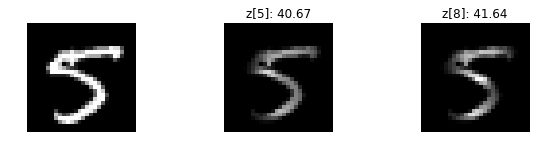

In [25]:
bad_pairs = set([(1,8), (5,0), (5, 8)])

bad_images = {}

for pair in bad_pairs:
    bad_images[pair] = []

for i in range(len(test_labels)):
    labelled_as = test_labels[i]
    predicted = preds_test[i]
    
    pair = (labelled_as, predicted)
    
    if pair in bad_pairs:
        bad_images[pair].append(test_images_normalized[i])

for bad_pair in bad_pairs:
    print(bad_pair)
    for i in range(3):
        im = bad_images[bad_pair][i]
        
        first_weights = image_averaged_weights[:, bad_pair[0]]
        im_mult_first_weights = np.multiply(im, first_weights)  #.clip(min=0)

        second_weights = image_averaged_weights[:, bad_pair[1]]
        im_mult_second_weights = np.multiply(im, second_weights)  #.clip(min=0)

        min_pix = np.min(np.array([im_mult_first_weights, im_mult_second_weights]))
        max_pix = np.max(np.array([im_mult_first_weights, im_mult_second_weights]))

        fig, axs = plt.subplots(1, 3, figsize=(10,2))

        plt.subplot(1, 3, 1)
        plt.axis('off')

        plt.imshow(im.reshape(28, 28), cmap='gray')

        plt.subplot(1, 3, 2)
        plt.axis('off')

        plt.imshow(im_mult_first_weights.reshape(28, 28), cmap='gray', vmin=min_pix, vmax=max_pix)
        plt.title("z[" + str(bad_pair[0]) + "]: " + str(np.round(np.sum(im_mult_first_weights) + biases[bad_pair[0]], 2)))

        plt.subplot(1, 3, 3)
        plt.axis('off')

        plt.imshow(im_mult_second_weights.reshape(28, 28), cmap='gray', vmin=min_pix, vmax=max_pix)        
        plt.title("z[" + str(bad_pair[1]) + "]: " + str(np.round(np.sum(im_mult_second_weights) + biases[bad_pair[1]], 2)))
        
        fig.savefig("average_weights_bad_pairs_" + str(bad_pair[0]) + "_" + str(bad_pair[1]) + "_" + str(i) + "_.png")